# easy_ViTPose demo
Be sure to enable GPU runtime

In [4]:
!git clone https://github.com/JunkyByte/easy_ViTPose.git
!cd easy_ViTPose/ && pip install -r requirements.txt && pip install -e .
!pip install huggingface_hub
!pip install onnx onnxruntime-gpu

fatal: destination path 'easy_ViTPose' already exists and is not an empty directory.
Already on 'develop'
Your branch is up to date with 'origin/develop'.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/easy_ViTPose
  Preparing metadata (setup.py) ... done
  Attempting uninstall: easy-ViTPose
    Found existing installation: easy-ViTPose 0.1
    Uninstalling easy-ViTPose-0.1:
      Successfully uninstalled easy-ViTPose-0.1
  Running setup.py develop for easy-ViTPose
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Restart the runtime (runtime -> restart runtime) to update installed packages versions

# Download the models

In [1]:
#@title Choose model and run this cell
#@markdown Only ONNX and torch models here

MODEL_TYPE = 'onnx'  #@param ["onnx", "torch"]
MODEL_SIZE = 'l'  #@param ['s', 'b', 'l', 'h']
YOLO_TYPE = 'onnx'  #@param ['onnx', 'torch']
YOLO_SIZE = 's'  #@param ['s', 'n']
ext = {'tensorrt': '.engine', 'onnx': '.onnx', 'torch': '.pth'}[MODEL_TYPE]
ext_yolo = {'onnx': '.onnx', 'torch': '.pt'}[YOLO_TYPE]

In [2]:
import os
from huggingface_hub import hf_hub_download
REPO_ID = 'JunkyByte/easy_ViTPose'
FILENAME = os.path.join(MODEL_TYPE, 'vitpose-25-' + MODEL_SIZE) + ext
FILENAME_YOLO = 'yolov5/yolov5' + YOLO_SIZE + ext_yolo

print(f'Downloading model {REPO_ID}/{FILENAME}')
model_path = hf_hub_download(repo_id=REPO_ID, filename=FILENAME)
yolo_path = hf_hub_download(repo_id=REPO_ID, filename=FILENAME_YOLO)

# Run inference

In [3]:
# If you get an error from PIL restart environment and rerun this cell to update packages version
from easy_ViTPose import VitInference
model = VitInference(model_path, yolo_path, MODEL_SIZE,
                     yolo_size=320, is_video=False)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
requirements: YOLOv8 requirement "gitpython>=3.1.30" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 54

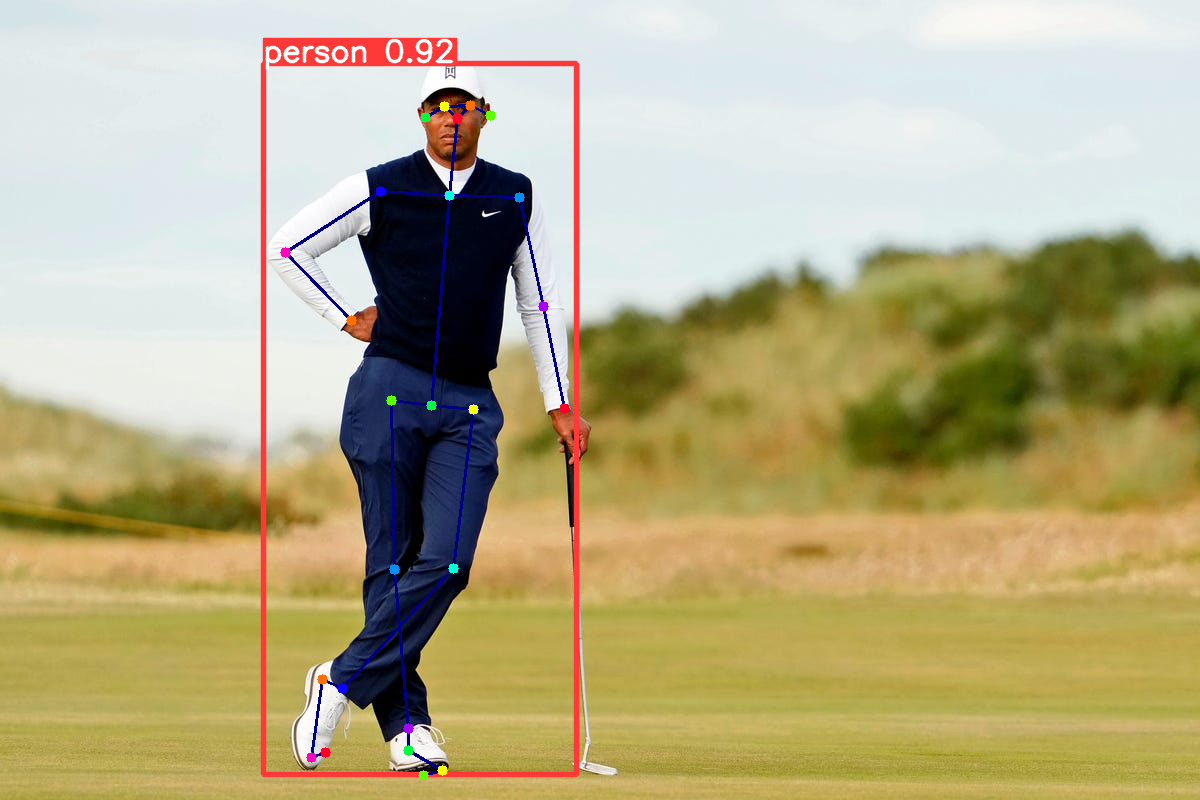

In [4]:
# Run inference on example image
import numpy as np
from io import BytesIO
from PIL import Image
from urllib.request import urlopen

# Load image and run inference
url = 'https://i.ibb.co/gVQpNqF/imggolf.jpg'
img = np.array(Image.open(BytesIO(urlopen(url).read())), dtype=np.uint8)

frame_keypoints = model.inference(img)
img = model.draw(show_yolo=True)

from google.colab.patches import cv2_imshow
cv2_imshow(img[..., ::-1])

Saving img1.jpg to img1.jpg


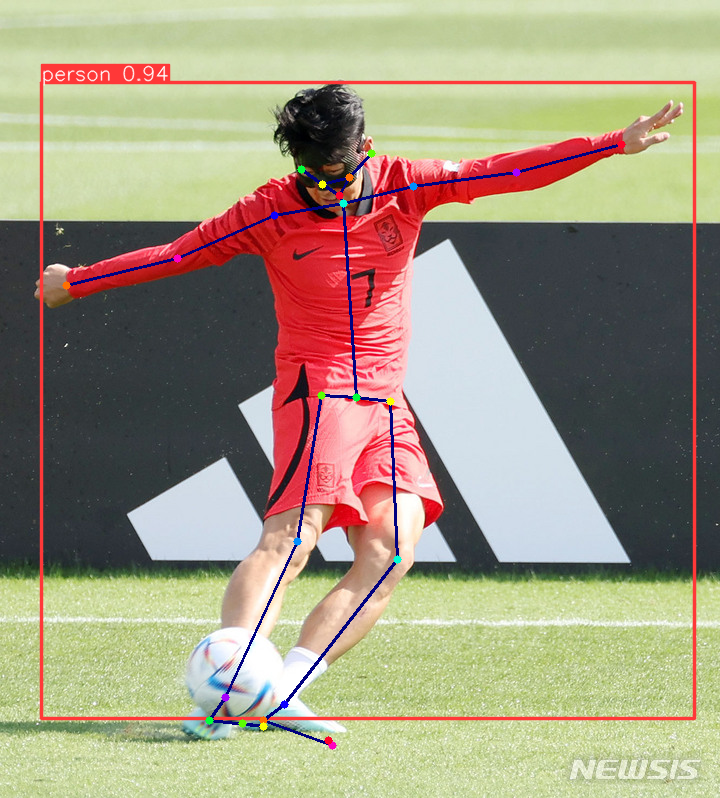

In [5]:
#@title Custom image
from google.colab import files
import numpy as np
from PIL import Image
from urllib.request import urlopen
import matplotlib.pyplot as plt
from vit_utils.visualization import draw_points_and_skeleton, joints_dict

img = np.array(Image.open(list(files.upload().keys())[0]), dtype=np.uint8)

frame_keypoints = model.inference(img)
img = model.draw(show_yolo=True)

from google.colab.patches import cv2_imshow
cv2_imshow(img[..., ::-1])